In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-01-26 21:24:12,106 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-01-26 21:24:12,106 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-01-26 21:24:12,107 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-01-26 21:24:12,108 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-01-26 21:24:12,108 Parameters: cosmological_simulation   = 0.0


In [10]:
def multi_phpl(ds, ion_list, w, h, rows, cols, ion_md, add_ion=False):
    if add_ion==True:
        trident.add_ion_fields(ds, ions=ion_list, ftype="gas")
    
    ad = ds.all_data()
    
    fig = plt.figure()
    
    get_cmap("cet_bmw")

    grid = AxesGrid(
        fig,
        (0, 0, w, h),
        nrows_ncols=(rows, cols),
        axes_pad=1.7,
        label_mode="L",
        share_all=True,
        cbar_location="right",
        cbar_mode ='each',
        cbar_size="3%",
        cbar_pad="0%",
        aspect=False,
    )

    for i in range(len(ion_md)):
        for j in range(len(ion_list)):
            n = i/2
            if n.is_integer()==True or i==0:
                p = yt.PhasePlot(ad, "density", "temperature", [ion_md[i]],
                                 weight_field="density", fractional=False)
                p.set_cmap(field=ion_md[i], cmap='cet_bmw')
                p.set_background_color(field=ion_md[i], color='black')
                p.set_font_size(22)
                p.annotate_title(ion_list[j])
#                 p.set_colorbar_label(label=ion_list[j]+' '+'Density (g/cm$^3$)', field=ion_md[i])
                p.set_zlim([("gas", ion_md[i])], 10**-40, 10**-26)
            else:
                p = yt.PhasePlot(ad, "density", "temperature", [ion_md[i]],
                                weight_field=ion_md[i], fractional=True)
                p.set_cmap(field=ion_md[i], cmap='cet_bmw')
                p.set_background_color(field=ion_md[i], color='black')
                p.set_font_size(24)
                p.annotate_title(ion_list[j])
#                 p.set_colorbar_label(label=ion_list[j]+' '+'Mass Probability Density', field=ion_md[i])
                p.set_zlim([("gas", ion_md[i])], 10**-16, 1)

            p.set_xlim(10**-29, 10**-23)
            p.set_ylim(10**3, 10**7)
            

            plot = p.plots[("gas", ion_md[i])]
            plot.figure = fig
            plot.axes = grid[i].axes
            plot.cax = grid.cbar_axes[i]
            p._setup_plots()
    return ad

YTRegion (UniformGridData): , center=[3.086e+22 1.543e+22 1.543e+22] cm, left_edge=[0. 0. 0.] cm, right_edge=[6.172e+22 3.086e+22 3.086e+22] cm

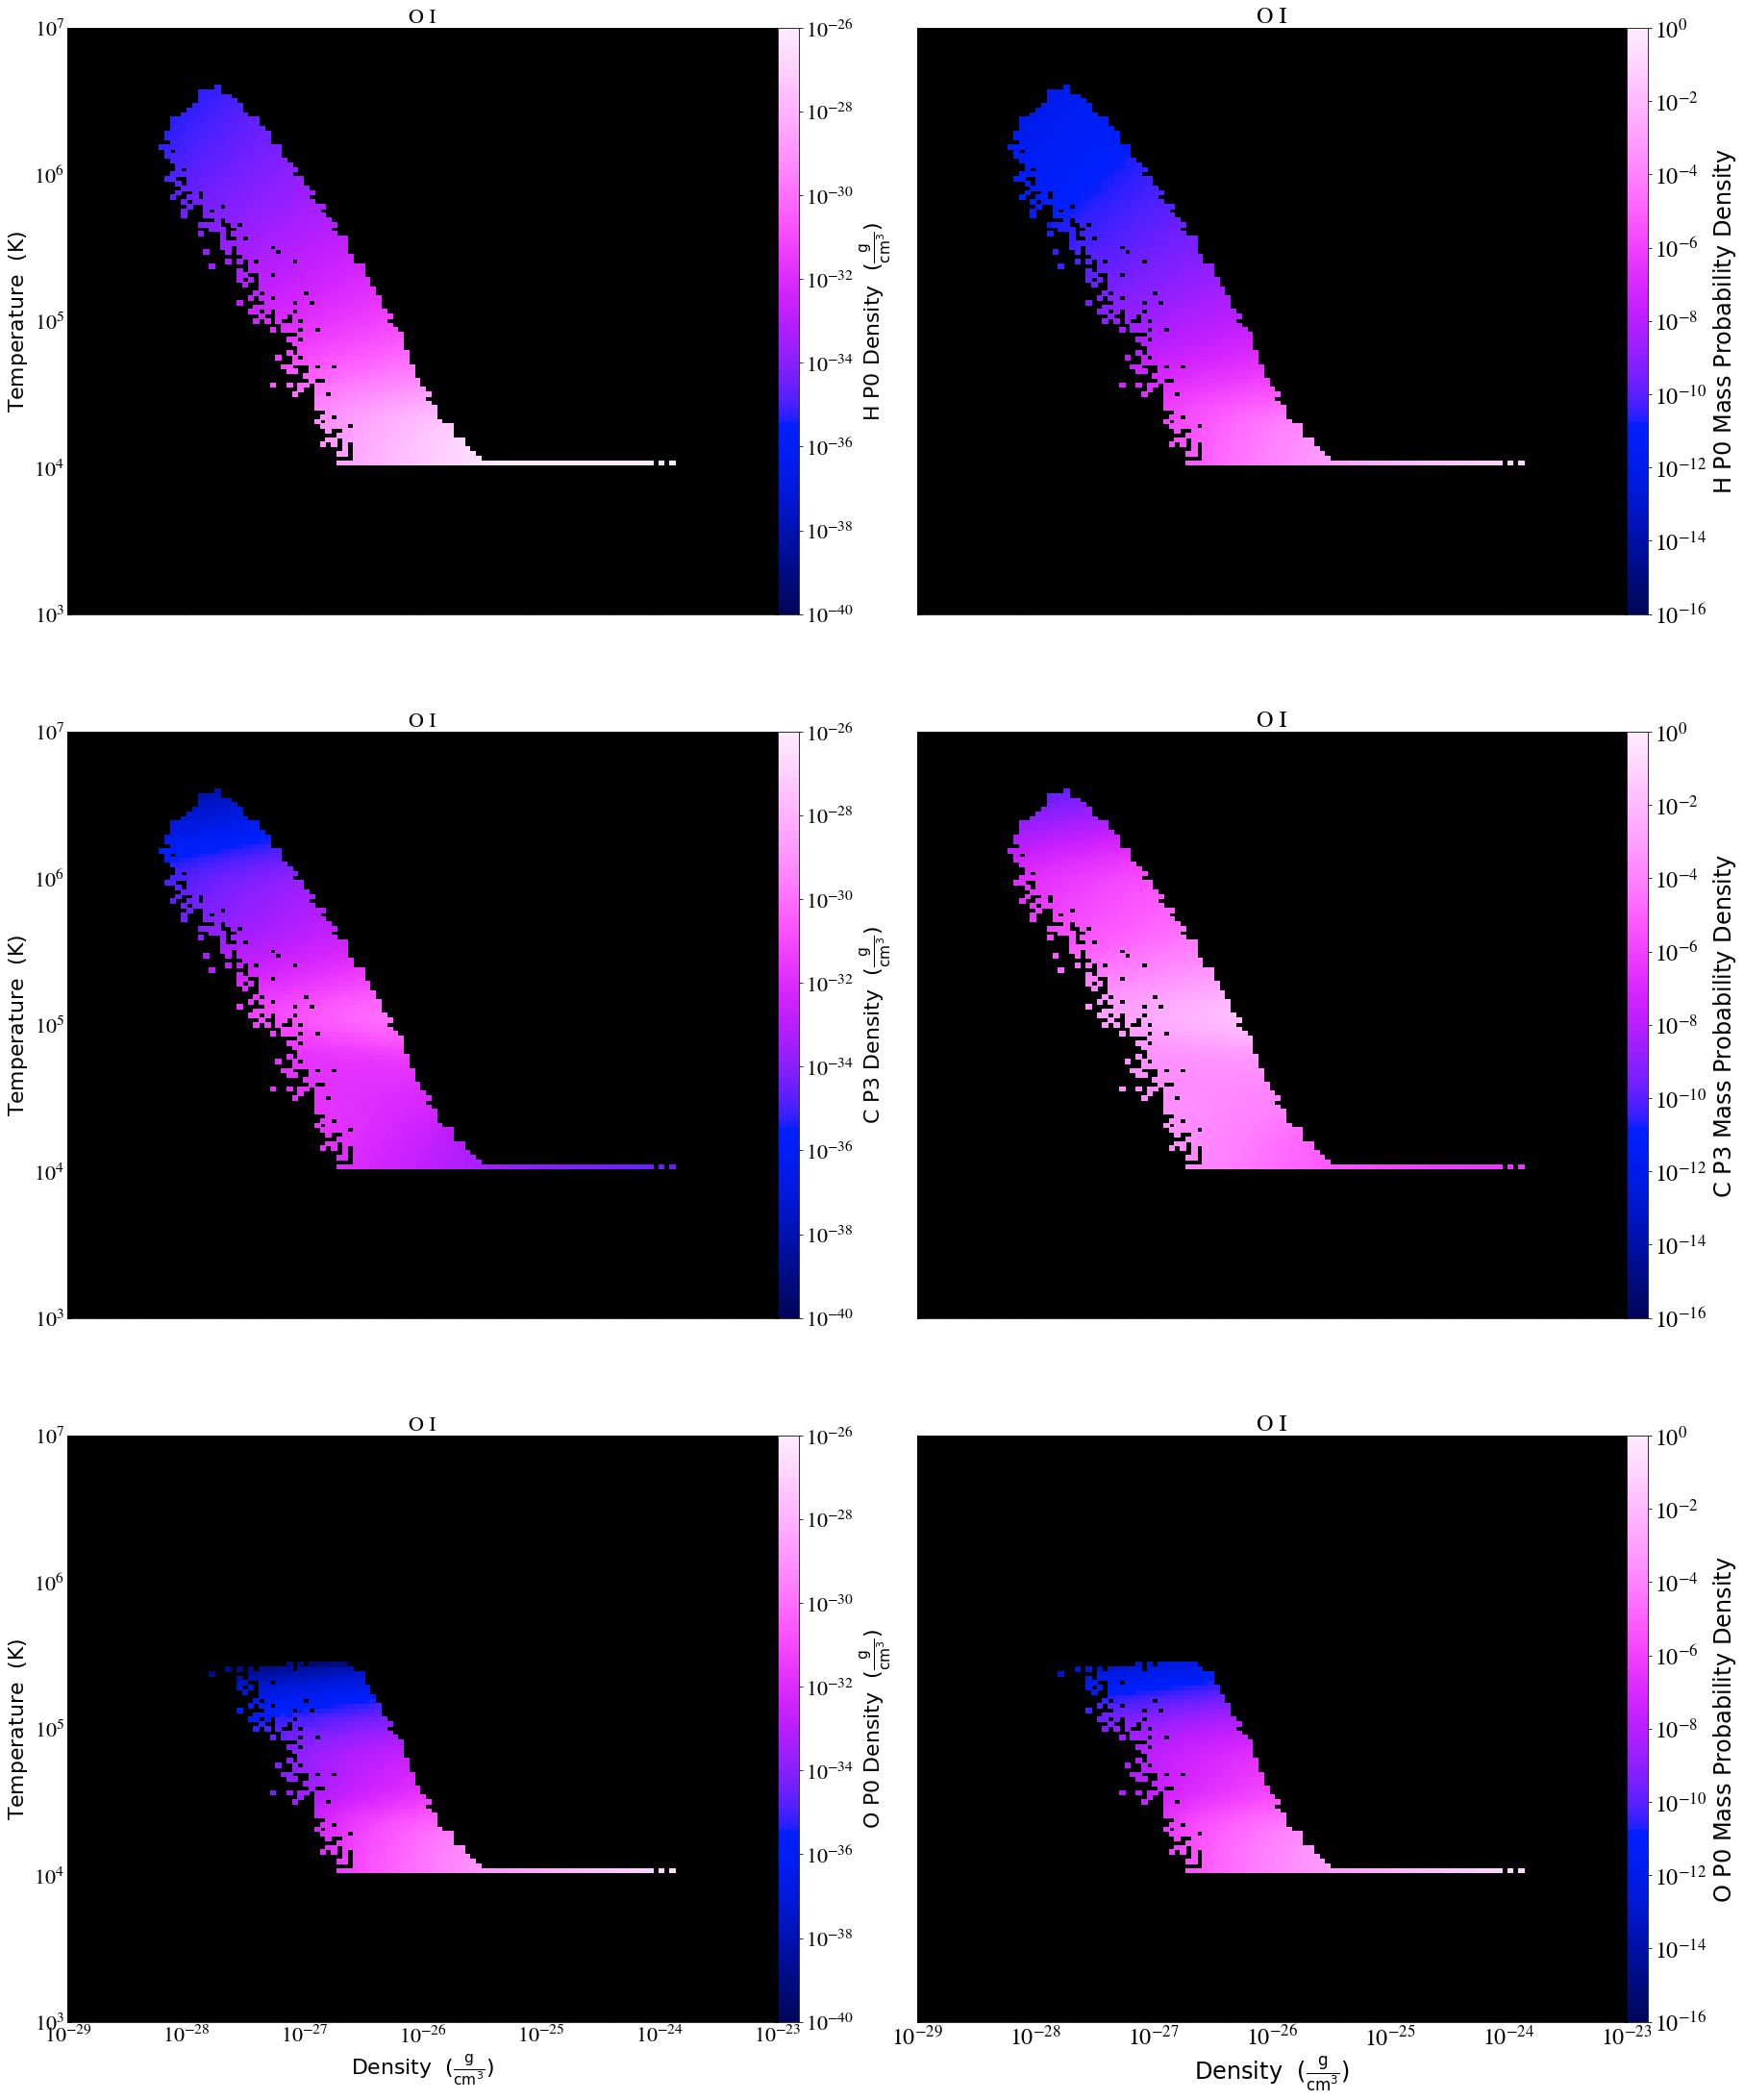

In [11]:
multi_phpl(ds, ['H I', 'C IV', 'O I'], 2,3, 3, 2, 
           ['H_p0_density', 'H_p0_mass', 'C_p3_density', 'C_p3_mass',
           'O_p0_density', 'O_p0_mass'], add_ion=False)